In [1]:
library("tidyverse")
library("dplyr")
library("zoo")
library("pomp")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘pomp’


The following object is masked from ‘package:zoo’:

    time<-


The following object is masked from ‘package:purrr’:

    map




In [2]:
setwd("~/Desktop/School/research/pf_mobility")

In [17]:
source("scripts/read_data.R")
source("constants/file_loc.R")

source("functions/d_measure.R")
source("functions/r_process.R")
source("functions/priors.R")
source("functions/disc_gamma.R")
source("functions/run_pfilter.R")
source("functions/simulate_data.R")
source("functions/get_renewal.R")
source("functions/get_true_rt.R")

In [18]:
alldata = read.csv('data/WHO-COVID-19-global-data.csv')
idcountry = which(alldata$Country == 'New Zealand')
Iday = alldata$New_cases[idcountry]

In [19]:
covid_nz <- data.frame(y = Iday, idx = 1:length(Iday))

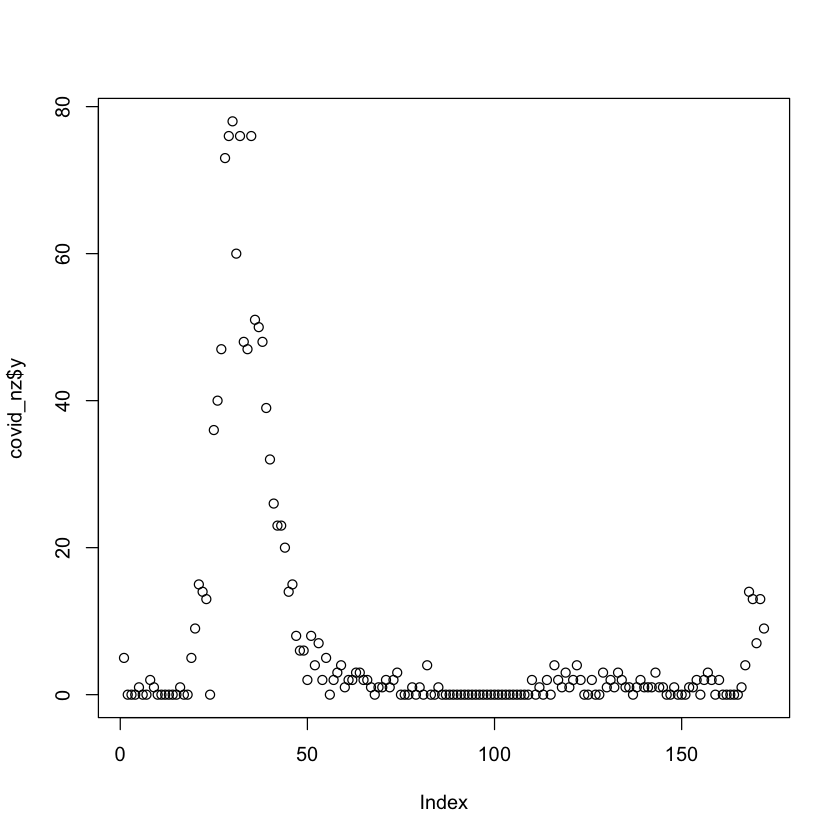

In [20]:
plot(covid_nz$y)

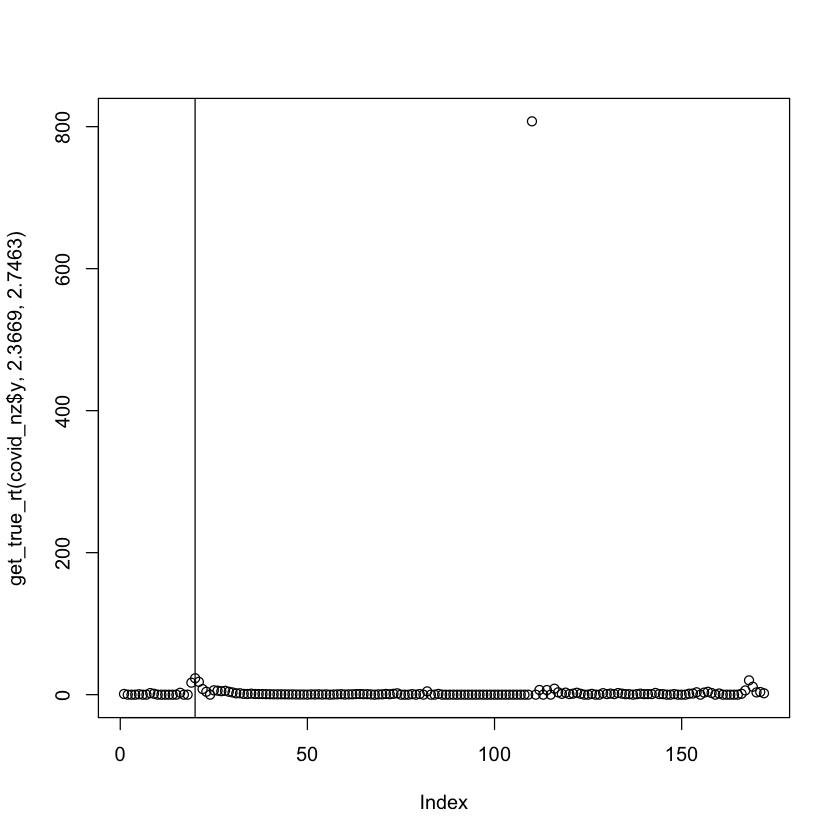

In [21]:
plot(get_true_rt(covid_nz$y, 2.3669, 2.7463))
abline(v=20)

In [22]:
covid_nz_rt<-get_rt(covid_nz$y, 2.3669, 2.7463)

In [23]:
which.max(covid_nz_rt)

[1] 110

In [114]:
nz_epifilter <- run_pfilter(rprocess_config = tran_normal_epifilter, dmeasure_config = meas_pois, data= covid_nz, 
                            shape = 2.3669, scale = 2.7463, x_init = 1, Np=500)

NOTE: The provided objects ‘T’,‘Y’ are available for use by POMP basic components.



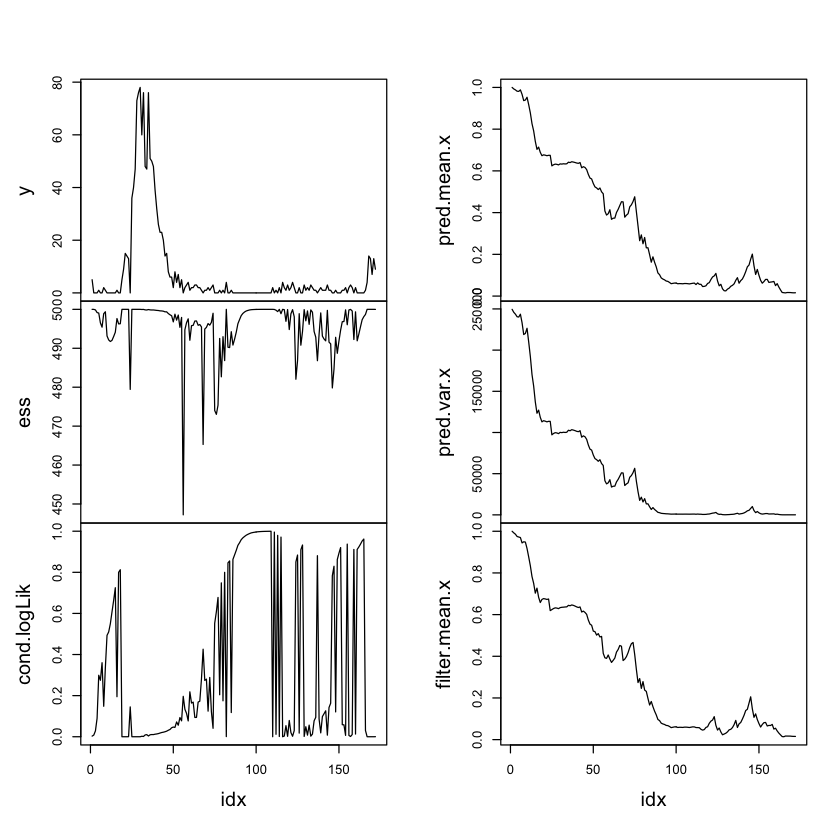

In [115]:
plot(nz_epifilter)

In [104]:
nz_myfilter <- run_pfilter(rprocess_config = tran_lognormal, dmeasure_config = meas_pois_lnorm, data= covid_nz,
                          shape = 2.3669, scale = 2.7463, x_init = 1, sdlog = 0.4, Np = 400)

NOTE: The provided objects ‘T’,‘Y’ are available for use by POMP basic components.



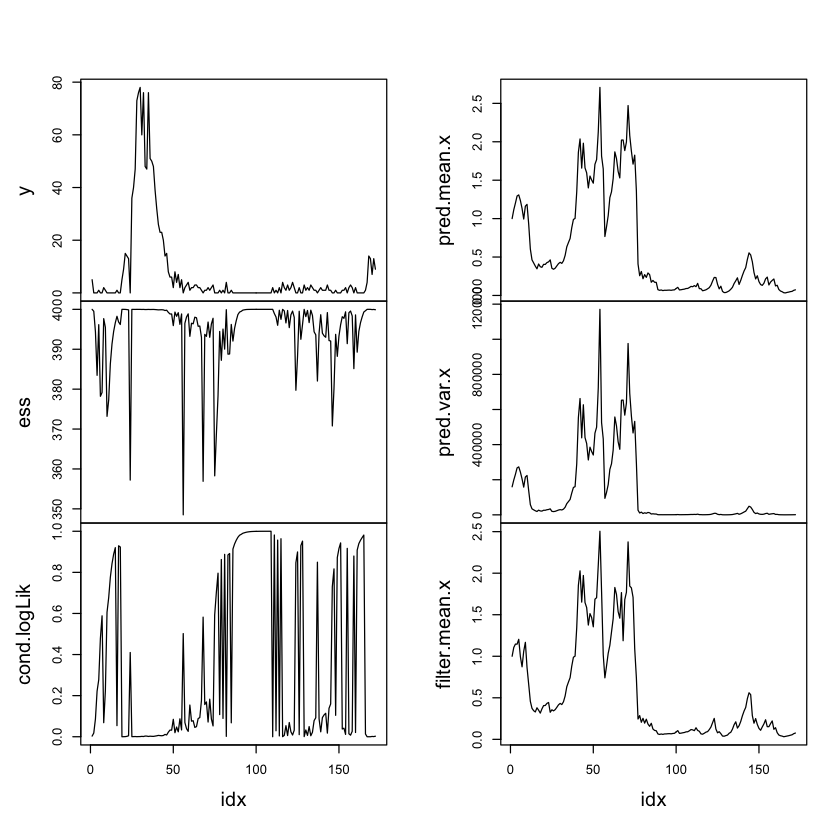

In [105]:
plot(nz_myfilter)

In [122]:
nz_prior_filter <- run_pfilter_priors(rprocess_config = tran_lognormal, dmeasure_config = meas_pois_lnorm, data= covid_nz,
                          shape = 2.3669, scale = 2.7463, x_init = 1, Np = 800)

NOTE: The provided objects ‘rpriors’,‘dpriors’,‘T’,‘Y’ are available for use by POMP basic components.



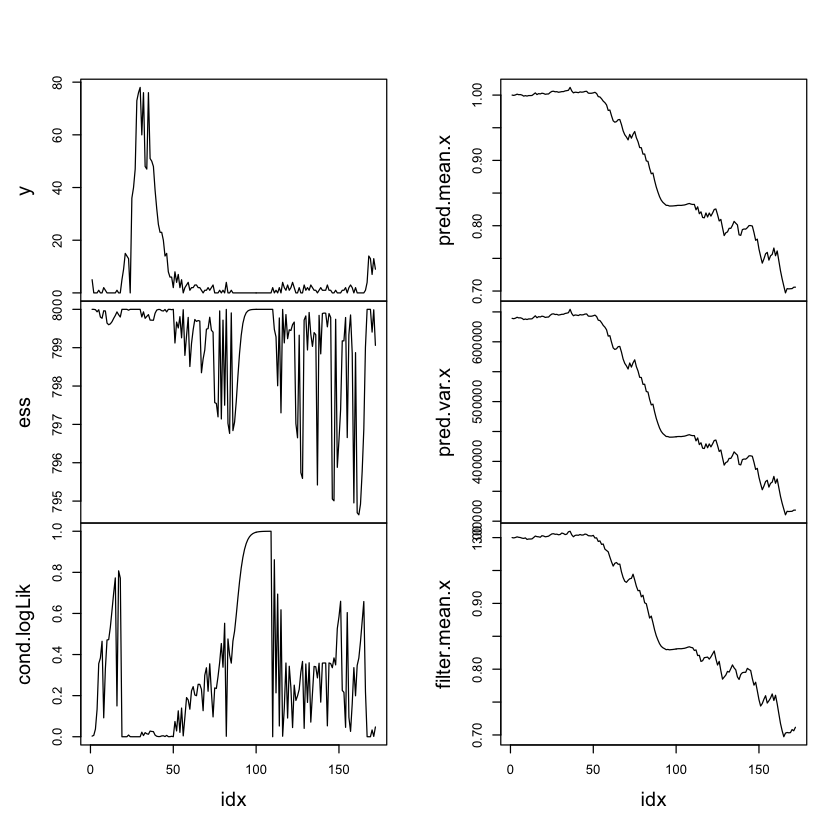

In [123]:
pomp::plot(nz_prior_filter)

In [108]:
nz_prior_result <- as.data.frame(nz_prior_filter)

<object of class ‘pfilterd_pomp’>

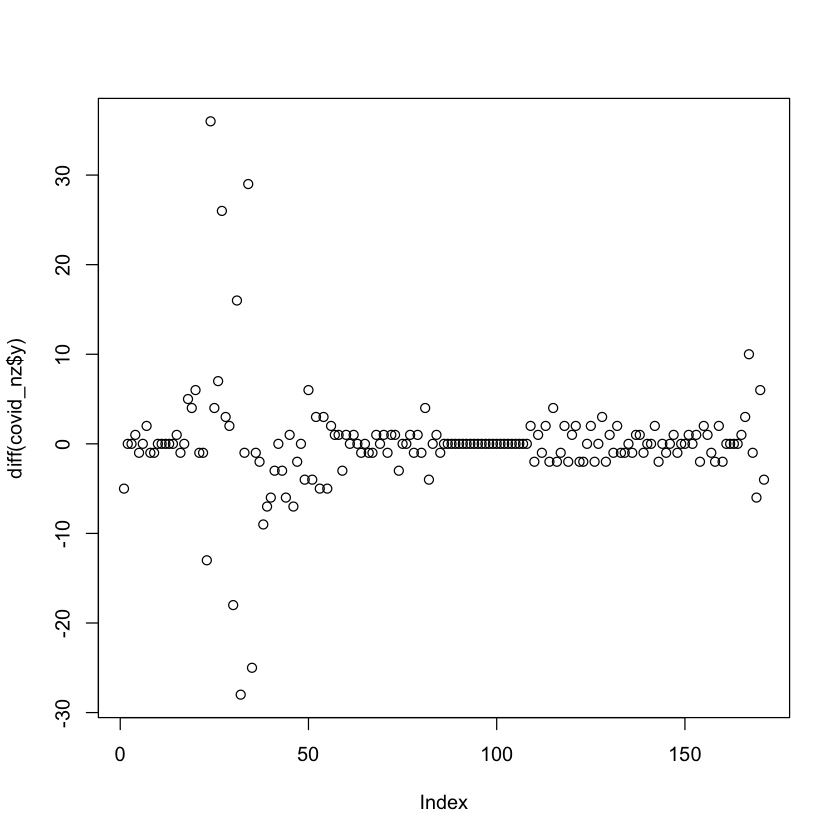

In [113]:
plot(diff(covid_nz$y))